**Data Description:**
- Player Database Dataset
- 196 Observations
- The average age is 21.14 years
- The average hours played is 5.85 hours


ISSUES:
- NA values in the gender variable
- Very large outliers, and a lot of 0 hours played entries


7 Variables:
- experience - String, and is one of: Beginner, Amateur, Regular, Pro, Veteran - Describes the level of experience a player has with the game
- subscribe - Boolean - Describes whether or not the player is subscribed to the newsletter
- hashedEmail - String - Player's email encrypted
- played_hours - Double - Player's number of hours on the server
- name - String - Player's real name
- gender - String - Player's gender
- Age - Integer - Player's age in years

**Questions**
- Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- Specific: Can number of hours played predict subscription status in the players dataset?
- Explanation: Since the data has both the data for number of hours played and subscription status, it will be relatively easy to create a K-NN prediction model for it.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("players.csv")

summary_players <- players |>
    summarize(avg_age = mean(Age, na.rm = TRUE),
              avg_hours = mean(played_hours, na.rm = TRUE))

summary_players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


avg_age,avg_hours
<dbl>,<dbl>
21.13918,5.845918


Warning message:
“Removed 4 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


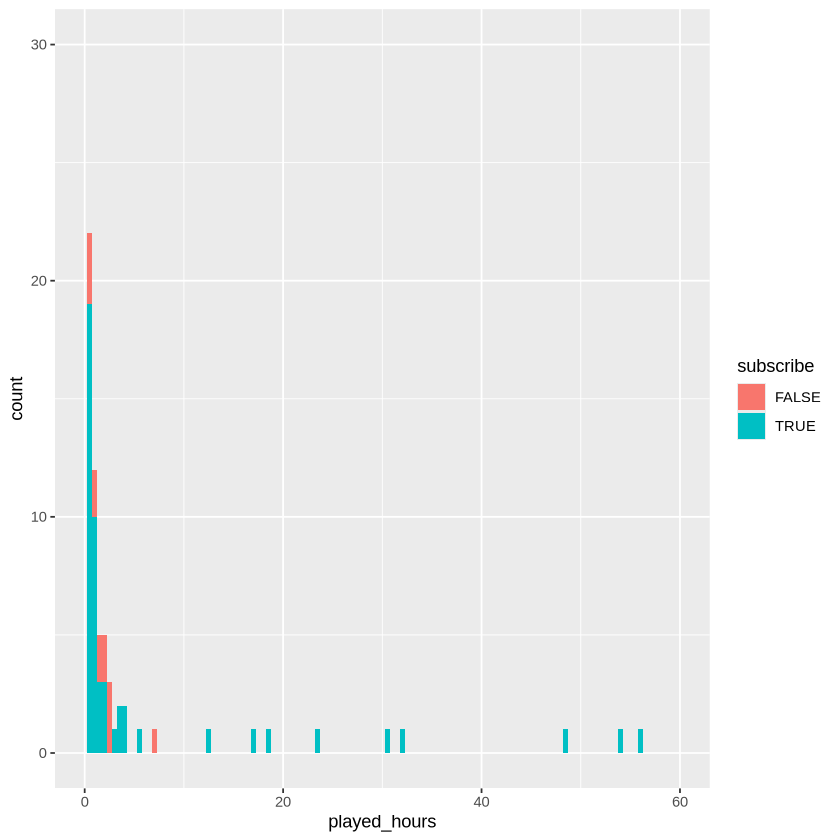

In [4]:
true_players_plot <- players |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 0.5) +
    xlim(0,60) +
    ylim(0,30)

true_players_plot

There are no non-subscribers to the newsletter that have played 10 or more hours on the server. This suggests that most people who play a lot on the server are generally subscribed to the newsletter.

**Methods and Plan**
K-NN Neighbors Classification
- This method is appropriate since I am asking whether or not a quantitative variable (played_hours) can predict a class (subscribe)
- Assumptions: Data needs to be scaled and centred
- Limitations: This model may not work well for classifications that are out of the training data's range, and it also fails to take into account the other player factors that may impact subscription status when answering the broad question
- I am going to use cross-validation with 5 splits to find the optimal K-value
- The model will be K-NN since we have not learned any other models for classification